#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [3]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [4]:
#取得Keras Dataset
(x_img_train, y_label_train), (x_img_test, y_label_test)=cifar10.load_data()

In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [10]:
#卷積層1

In [11]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 padding='same'))

In [12]:
model.add(Dropout(rate=0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#卷積層2與池化層2

In [15]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [19]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [21]:
model.add(Dense(10, activation='softmax'))

In [22]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [23]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [40]:
#選用 "categorical_crossentropy"為loss function
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [41]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 46s 1ms/step - loss: 1.3140 - acc: 0.5347 - val_loss: 1.3635 - val_acc: 0.5573
Epoch 2/12
37500/37500 [==============================] - 48s 1ms/step - loss: 1.2860 - acc: 0.5436 - val_loss: 1.3420 - val_acc: 0.5670
Epoch 3/12
37500/37500 [==============================] - 45s 1ms/step - loss: 1.2599 - acc: 0.5545 - val_loss: 1.3242 - val_acc: 0.5668
Epoch 4/12
37500/37500 [==============================] - 44s 1ms/step - loss: 1.2424 - acc: 0.5606 - val_loss: 1.3094 - val_acc: 0.5788
Epoch 5/12
37500/37500 [==============================] - 45s 1ms/step - loss: 1.2312 - acc: 0.5630 - val_loss: 1.2816 - val_acc: 0.5827
Epoch 6/12
37500/37500 [==============================] - 44s 1ms/step - loss: 1.2050 - acc: 0.5757 - val_loss: 1.2674 - val_acc: 0.5886
Epoch 7/12
37500/37500 [==============================] - 45s 1ms/step - loss: 1.1898 - acc: 0.5807 - val_loss: 1.2611 - val_acc

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train history")
    plt.xlabel("Epoch")
    plt.ylabel(train)
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

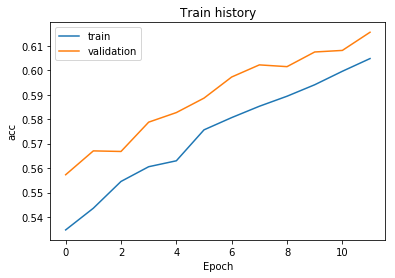

In [43]:
show_train_history(train_history, "acc", "val_acc")

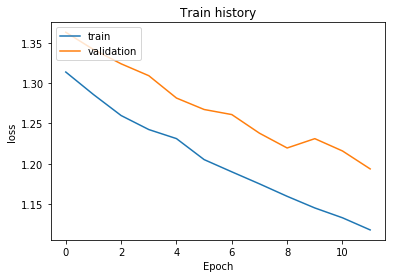

In [44]:
show_train_history(train_history, "loss", "val_loss")

In [ ]:
#選用 "MSE"為loss function

In [49]:
model.compile(loss="MSE", optimizer="sgd", metrics=["accuracy"])

In [50]:
train_history = model.fit(x=x_img_train_normalize, y=y_label_train_OneHot, validation_split=0.2, epochs=12, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0698 - acc: 0.4413 - val_loss: 0.0715 - val_acc: 0.4622
Epoch 2/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0696 - acc: 0.4413 - val_loss: 0.0715 - val_acc: 0.4628
Epoch 3/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0695 - acc: 0.4429 - val_loss: 0.0713 - val_acc: 0.4661
Epoch 4/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0693 - acc: 0.4440 - val_loss: 0.0712 - val_acc: 0.4644
Epoch 5/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0691 - acc: 0.4479 - val_loss: 0.0711 - val_acc: 0.4682
Epoch 6/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0691 - acc: 0.4491 - val_loss: 0.0709 - val_acc: 0.4672
Epoch 7/12
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0690 - acc: 0.4473 - val_loss: 0.0709 - val_acc

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

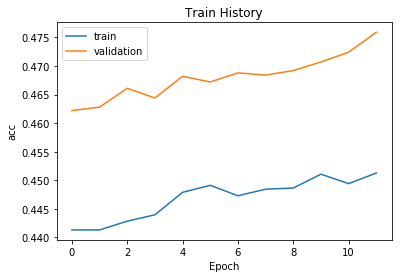

In [52]:
show_train_history(train_history, "acc", "val_acc")

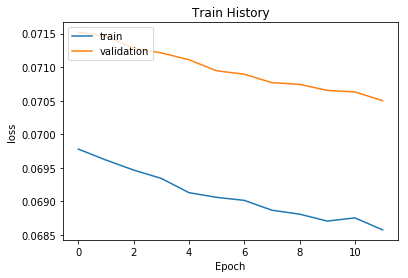

In [53]:
show_train_history(train_history, "loss", "val_loss")

In [24]:
#選用 "binary _crossentropy"為loss function

In [25]:
from keras import losses
model.compile(loss=losses.binary_crossentropy, optimizer="sgd", metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [37]:
train_history = model.fit(x=x_img_train_normalize, y=y_label_train_OneHot, validation_split=0.2, epochs=12, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 50s 1ms/step - loss: 0.2817 - acc: 0.9012 - val_loss: 0.2865 - val_acc: 0.9003
Epoch 2/12
40000/40000 [==============================] - 52s 1ms/step - loss: 0.2802 - acc: 0.9011 - val_loss: 0.2848 - val_acc: 0.9002
Epoch 3/12
40000/40000 [==============================] - 48s 1ms/step - loss: 0.2783 - acc: 0.9013 - val_loss: 0.2834 - val_acc: 0.9002
Epoch 4/12
40000/40000 [==============================] - 49s 1ms/step - loss: 0.2762 - acc: 0.9016 - val_loss: 0.2816 - val_acc: 0.9003
Epoch 5/12
40000/40000 [==============================] - 52s 1ms/step - loss: 0.2744 - acc: 0.9018 - val_loss: 0.2800 - val_acc: 0.9004
Epoch 6/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.2727 - acc: 0.9021 - val_loss: 0.2782 - val_acc: 0.9004
Epoch 7/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.2707 - acc: 0.9026 - val_loss: 0.2765 - val_acc

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel(train)
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

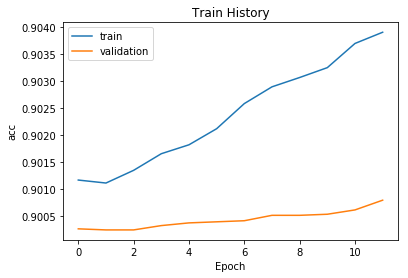

In [39]:
show_train_history(train_history, "acc", "val_acc")

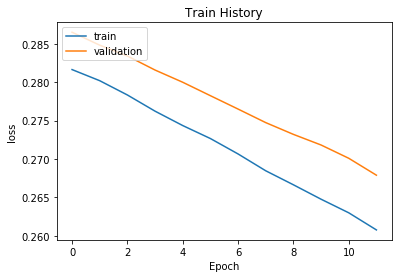

In [40]:
show_train_history(train_history, "loss", "val_loss")

In [41]:
#選用 "categorical_crossentropy"為loss function (test資料)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [42]:
test_history = model.fit(x=x_img_test_normalize, y=y_label_test_OneHot, validation_split=0.2, epochs=12, batch_size=128, verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/12
8000/8000 [==============================] - 10s 1ms/step - loss: 1.7659 - acc: 0.3794 - val_loss: 1.7887 - val_acc: 0.4010
Epoch 2/12
8000/8000 [==============================] - 10s 1ms/step - loss: 1.7526 - acc: 0.3768 - val_loss: 1.7857 - val_acc: 0.4020
Epoch 3/12
8000/8000 [==============================] - 11s 1ms/step - loss: 1.7089 - acc: 0.3910 - val_loss: 1.7436 - val_acc: 0.4170
Epoch 4/12
8000/8000 [==============================] - 11s 1ms/step - loss: 1.6899 - acc: 0.3969 - val_loss: 1.7516 - val_acc: 0.4080
Epoch 5/12
8000/8000 [==============================] - 9s 1ms/step - loss: 1.6613 - acc: 0.4081 - val_loss: 1.7238 - val_acc: 0.4160
Epoch 6/12
8000/8000 [==============================] - 9s 1ms/step - loss: 1.6346 - acc: 0.4173 - val_loss: 1.7217 - val_acc: 0.3965
Epoch 7/12
8000/8000 [==============================] - 9s 1ms/step - loss: 1.6346 - acc: 0.4070 - val_loss: 1.6970 - val_acc: 0.4325
Epoch 8/12

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_test_history(test_history, train, validation):
    plt.plot(test_history.history[train])
    plt.plot(test_history.history[validation])
    plt.title("Test History")
    plt.xlabel("Epoch")
    plt.ylabel(train)
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

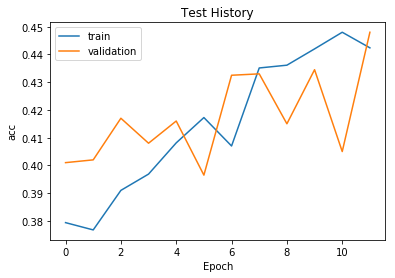

In [47]:
show_test_history(test_history, "acc", "val_acc")

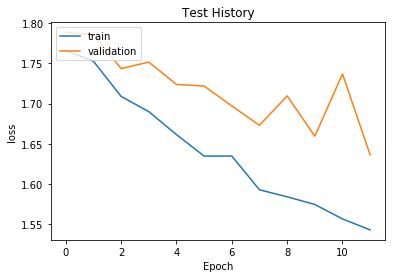

In [48]:
show_test_history(test_history, "loss", "val_loss")